In [26]:
import os
import sys
from pathlib import Path

import torchvision
from torchvision import transforms

import torch
import torch.nn as nn
from ml_functions.data_loaders.create_data_loaders import create_data_loaders
from ml_functions.train_test.Train_Test import train_test_model
from ml_functions.model_builders.Model_builder import TinyVGG

from torch.utils.data import DataLoader


# load the data
train_dir = './data/MNIST/train/train.csv'
test_dir = './data/MNIST/test/test.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset
from ml_functions.model_builders.Model_builder import TinyVGG
from ml_functions.train_test.Train_Test import train_test_model, plot_results

In [2]:
df  = pd.read_csv(train_dir)

In [8]:
df_train = df[0:int(42000*.8)]
df_test  = df[int(42000*.8):]
df_train.to_csv('./data/MNIST/train/train_train.csv',index=False)
df_test.to_csv('./data/MNIST/train/train_test.csv', index=False)

train_dir = './data/MNIST/train/train_train.csv'
test_dir = './data/MNIST/train/train_test.csv' # validation set. Test is for prediction in kaggle.

In [23]:
# create the dataset

In [20]:
class MnistDataSet(Dataset):
    def __init__(self, dataset_addr):
        self.df        = pd.read_csv(dataset_addr)
        self.df_labels = self.df['label']
        self.df        = self.df.drop(columns=['label'])
        self.dataset   = torch.reshape(torch.tensor(self.df.to_numpy()).float(), (len(self.df), 1, 28, 28))
        self.labels    = torch.tensor(self.df_labels.to_numpy().reshape(-1)).long()
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        return self.dataset[idx], self.labels[idx]
    
    def classes(self):
        return self.labels.unique()

In [21]:
ds_train_mnist = MnistDataSet(train_dir)
ds_test_mnist  = MnistDataSet(test_dir)
n_classes      = len(ds_train_mnist.classes())

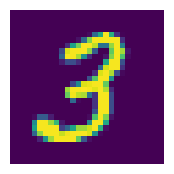

In [26]:
fig, ax = plt.subplots(figsize=(2,2))
ax.imshow(torch.squeeze(ds_train_mnist.dataset[70]).numpy())
ax.set_axis_off()

In [11]:
# create the dataloaders

In [22]:
batch_size = 32
train_dataloader = DataLoader(ds_train_mnist, batch_size=batch_size, shuffle=True)
test_dataloader  = DataLoader(ds_test_mnist, batch_size=batch_size, shuffle=True)


In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [28]:
# load the model
torch.manual_seed(42)
model_0 = TinyVGG(input_shape =1, hidden_units=10, output_shape= n_classes).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
    (2): Softmax(dim=1)
  )
)

In [29]:
lr        = 0.1
loss_fn   = nn.modules.loss.BCELoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=lr)
n_epochs  = 5
n_samples = 1  # record results every two epochs

In [30]:
loss_train_epochs, acc_train_epochs, loss_test_epochs, acc_test_epochs, num_epoch = train_test_model(
    n_epochs, n_samples, n_classes, model_0, loss_fn, optimizer, train_dataloader, test_dataloader, device)

  0%|          | 0/5 [00:00<?, ?it/s]

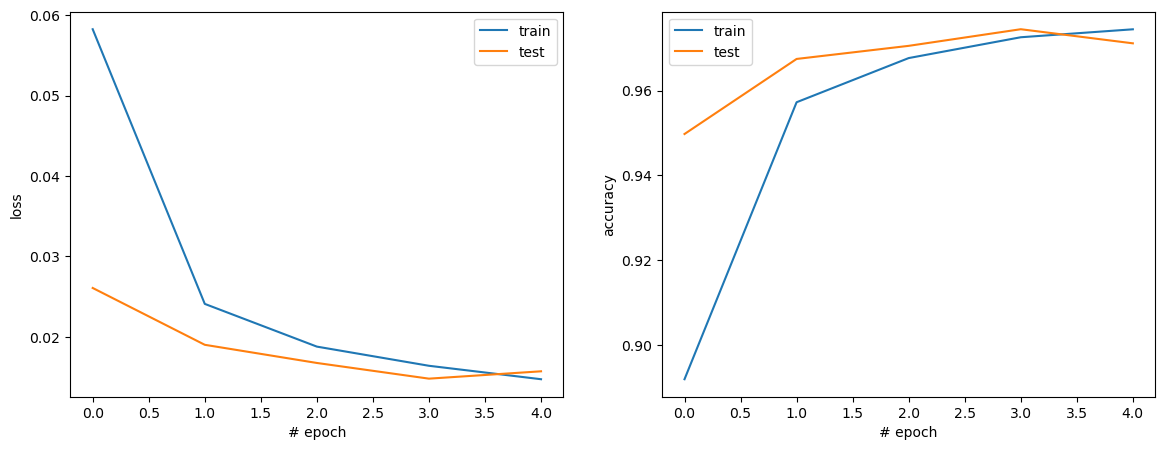

In [31]:
plot_results(num_epoch, loss_train_epochs, acc_train_epochs, loss_test_epochs, acc_test_epochs)